1. Load data

In [46]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# filename = input('Please key in the filename: ')
# df = pd.read_csv(filename)
# df

In [47]:
path = '/content/sample_data/sales2019/'
dataframe = pd.read_csv(path + 'sales2019_1.csv') # transfer multiple files in the same folder
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


2. Clean and Preprocess data

2.1. Merge 12-month data

In [ ]:
frames = []
for file in os.listdir(path):   # Path to a folder and returns a list of values contained within that folder
    filepath = path + file      # Create path for each file
    df1 = pd.read_csv(filepath) # Generate data frame for each file based on its path
    frames.append(df1)          # Add that data frame to the list of frames
    result = pd.concat(frames)  # Pass that list to concat method

df = result
df.to_csv('SumSales2019.csv', index = False)    # Merge 12 files into one big file SumSales2019.csv


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.2. Add 'month' column

In [50]:
df['Month'] = df['Order Date'].str.slice(start = 0, stop = 2, step = 1)     # Slice first 2 digits of 'Order Date' column
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06


In [51]:
print(set(df['Month']))

{'09', '02', '05', '07', '10', '11', '03', 'Or', '01', '08', nan, '06', '04', '12'}


2.3. Get rid of 'nan' and 'Or' value in 'Month' column

In [52]:
df = df.dropna(how = 'all')     # Remove 'nan' value in 'Month' column
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06


In [53]:
df = df[df['Month'] != 'Or']    # Update dataframe, remove rows containing 'Or' value in 'Month' column
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06


3. Reporting

3.1. What was the best month for sales? How much was earned that month?

### Filter data by month, add up all order values for that month by multiplying the quantity of products sold ('Quantity Ordered' column) by the price of a product ('Price Each' column) => Create an extra column to store the above values

In [82]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [81]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')    # Convert the types of the 'Quantity Ordered' column to integer
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')  # Convert the typesof the 'Price Each' column to float

In [56]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,209921,USB-C Charging Cable,1,11.950000,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06,11.950000
1,209922,Macbook Pro Laptop,1,1700.000000,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06,1700.000000
2,209923,ThinkPad Laptop,1,999.989990,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06,999.989990
3,209924,27in FHD Monitor,1,149.990005,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06,149.990005
4,209925,Bose SoundSport Headphones,1,99.989998,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06,99.989998
5,209926,Apple Airpods Headphones,1,150.000000,06/28/19 20:04,"386 Lake St, Seattle, WA 98101",06,150.000000
6,209927,Lightning Charging Cable,1,14.950000,06/28/19 00:07,"29 Lincoln St, Los Angeles, CA 90001",06,14.950000
7,209928,Apple Airpods Headphones,1,150.000000,06/16/19 21:30,"350 9th St, New York City, NY 10001",06,150.000000
8,209929,Wired Headphones,1,11.990000,06/28/19 10:56,"612 Meadow St, Portland, OR 97035",06,11.990000
9,209930,27in FHD Monitor,1,149.990005,06/02/19 11:22,"625 Ridge St, Los Angeles, CA 90001",06,149.990005


In [57]:
# Move the 'Sales' column to the right of the 'Price Each' column

moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.950000,11.950000,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06
1,209922,Macbook Pro Laptop,1,1700.000000,1700.000000,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06
2,209923,ThinkPad Laptop,1,999.989990,999.989990,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06
3,209924,27in FHD Monitor,1,149.990005,149.990005,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06
4,209925,Bose SoundSport Headphones,1,99.989998,99.989998,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06


In [58]:
df.groupby('Month').sum()['Sales']

<ipython-input-58-f509dd37a9aa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Month').sum()['Sales']


Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [59]:
# Print the month with the highest revenue

sales_value = df.groupby('Month').sum()['Sales']
sales_value.max()

<ipython-input-59-738672c3e987>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_value = df.groupby('Month').sum()['Sales']


4613443.5

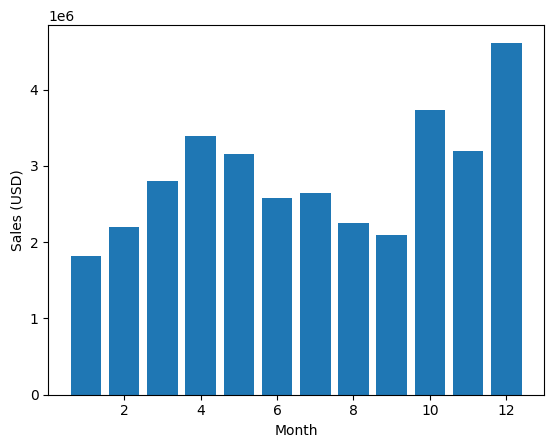

In [60]:
# Plot the revenue chart by month

months = range(1, 13)
plt.bar(x = months, height = sales_value)
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.show()

3.2. What city has the best sales?

### Add the 'City' column to the dataframe by split the values after the first comma of the 'Purchase Address' column

In [61]:
address_city = lambda address:address.split(',')[1]

In [62]:
df['City'] = df['Purchase Address'].apply(address_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,209921,USB-C Charging Cable,1,11.950000,11.950000,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06,Portland
1,209922,Macbook Pro Laptop,1,1700.000000,1700.000000,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06,San Francisco
2,209923,ThinkPad Laptop,1,999.989990,999.989990,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06,Los Angeles
3,209924,27in FHD Monitor,1,149.990005,149.990005,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06,Seattle
4,209925,Bose SoundSport Headphones,1,99.989998,99.989998,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06,San Francisco


In [63]:
df.groupby('City').sum()['Sales']

<ipython-input-63-c0c5c556371f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City').sum()['Sales']


City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [64]:
# Print the city with the highest revenue

sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city.max()

<ipython-input-64-e78e16d51eac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_value_city = df.groupby('City').sum()['Sales']


8262204.0

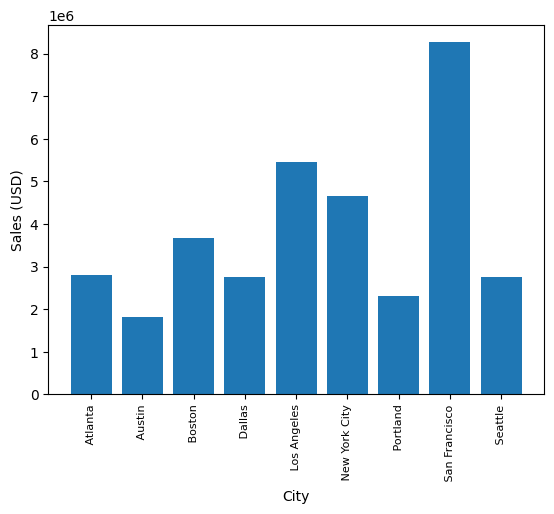

In [65]:
# Plot the revenue chart of each city

cities = [city for city, sales in sales_value_city.items()]
plt.bar(x = cities, height = sales_value_city)
plt.xticks(cities, rotation = 90, size = 8)
plt.xlabel('City')
plt.ylabel('Sales (USD)')
plt.show()

3.3. What time should we display ads to maximize the likehood of customer's buying product?

### Add 'Hours' column to store the value of time frames

In [66]:
print(df['Order Date'].dtypes)

object


In [67]:
df['Order Date'] = pd.to_datetime(df['Order Date'])     # Convert the types of 'Ordered Date' column to datetime

In [68]:
df['Hours'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,209921,USB-C Charging Cable,1,11.950000,11.950000,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",06,Portland,19
1,209922,Macbook Pro Laptop,1,1700.000000,1700.000000,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",06,San Francisco,10
2,209923,ThinkPad Laptop,1,999.989990,999.989990,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",06,Los Angeles,20
3,209924,27in FHD Monitor,1,149.990005,149.990005,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",06,Seattle,10
4,209925,Bose SoundSport Headphones,1,99.989998,99.989998,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",06,San Francisco,18


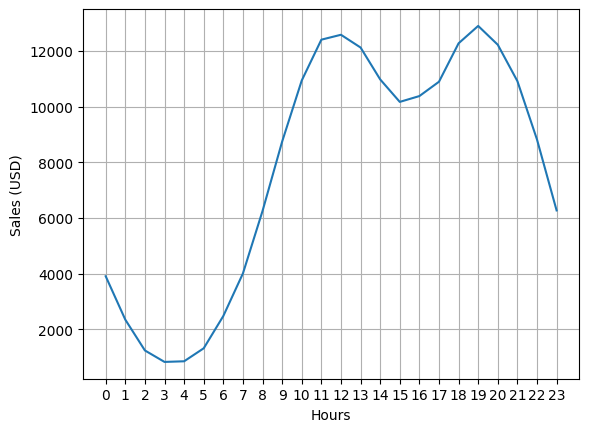

In [69]:
# Plot the hourly sales chart

df.groupby('Hours').count()['Sales']

sales_value_hours = df.groupby('Hours').count()['Sales']
sales_value_hours.max()

hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales (USD)')
plt.show()

3.4. What products are most often sold together?

### Products purchased at the same time and delivered to the same location => Have the same 'Ordered ID'

In [70]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,209921,USB-C Charging Cable,1,11.950000,11.950000,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",06,Portland,19
1,209922,Macbook Pro Laptop,1,1700.000000,1700.000000,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",06,San Francisco,10
2,209923,ThinkPad Laptop,1,999.989990,999.989990,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",06,Los Angeles,20
3,209924,27in FHD Monitor,1,149.990005,149.990005,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",06,Seattle,10
4,209925,Bose SoundSport Headphones,1,99.989998,99.989998,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",06,San Francisco,18


In [71]:
# Save the value of rows with repeated 'Ordered ID'

df_dup = df[df['Order ID'].duplicated(keep = False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
17,209938,iPhone,1,700.00,700.00,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",06,Seattle,12
18,209938,Wired Headphones,1,11.99,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",06,Seattle,12
29,209949,Google Phone,1,600.00,600.00,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",06,San Francisco,7
30,209949,USB-C Charging Cable,1,11.95,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",06,San Francisco,7
41,209960,USB-C Charging Cable,1,11.95,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",06,Dallas,11


In [72]:
groupProduct = lambda product: ', '.join(product)

In [73]:
# Remove duplicate lines

df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

<ipython-input-73-6f5e0bfd1a3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
17,209938,iPhone,1,700.00,700.00,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",06,Seattle,12,"iPhone, Wired Headphones"
18,209938,Wired Headphones,1,11.99,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",06,Seattle,12,"iPhone, Wired Headphones"
29,209949,Google Phone,1,600.00,600.00,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",06,San Francisco,7,"Google Phone, USB-C Charging Cable"
30,209949,USB-C Charging Cable,1,11.95,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",06,San Francisco,7,"Google Phone, USB-C Charging Cable"
41,209960,USB-C Charging Cable,1,11.95,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",06,Dallas,11,"USB-C Charging Cable, AA Batteries (4-pack)"


In [74]:
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup

,Order ID,All Products
17,209938,"iPhone, Wired Headphones"
29,209949,"Google Phone, USB-C Charging Cable"
41,209960,"USB-C Charging Cable, AA Batteries (4-pack)"
43,209961,"iPhone, Lightning Charging Cable"
147,210064,"Lightning Charging Cable, 27in FHD Monitor"
...,...,...
9500,150287,"iPhone, Lightning Charging Cable"
9517,150303,"iPhone, Lightning Charging Cable"
9538,150323,"Google Phone, USB-C Charging Cable, Apple Airp..."
9552,150335,"iPhone, Apple Airpods Headphones"


In [75]:
# Count the number of each iteration of the products

df_dup['All Products'].value_counts( )

iPhone, Lightning Charging Cable                                   882
Google Phone, USB-C Charging Cable                                 856
iPhone, Wired Headphones                                           361
Vareebadd Phone, USB-C Charging Cable                              312
Google Phone, Wired Headphones                                     303
                                                                  ... 
LG Dryer, AAA Batteries (4-pack)                                     1
Vareebadd Phone, USB-C Charging Cable, Apple Airpods Headphones      1
Google Phone, Wired Headphones, AA Batteries (4-pack)                1
Flatscreen TV, 20in Monitor                                          1
Google Phone, USB-C Charging Cable, Apple Airpods Headphones         1
Name: All Products, Length: 366, dtype: int64

3.5. What product sold the most? Why do you think it sold the most?

In [76]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,209921,USB-C Charging Cable,1,11.950000,11.950000,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",06,Portland,19
1,209922,Macbook Pro Laptop,1,1700.000000,1700.000000,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",06,San Francisco,10
2,209923,ThinkPad Laptop,1,999.989990,999.989990,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",06,Los Angeles,20
3,209924,27in FHD Monitor,1,149.990005,149.990005,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",06,Seattle,10
4,209925,Bose SoundSport Headphones,1,99.989998,99.989998,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",06,San Francisco,18


In [83]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
all_products

<ipython-input-83-1377def459d8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_products = df.groupby('Product').sum()['Quantity Ordered']


Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

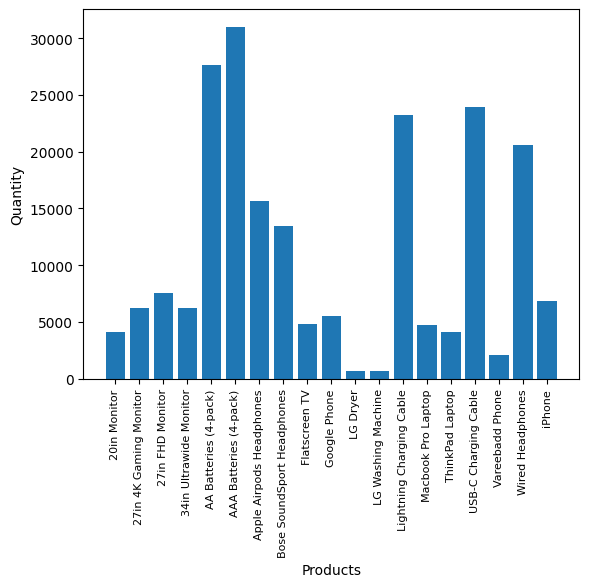

In [78]:
products_ls = [product for product, quant in all_products.items()]
plt.bar(products_ls, all_products)
plt.xticks(products_ls, rotation = 90, size = 8)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

### The effect of price factor on sales

### Draw more product price chart superimposed on product sales chart

In [79]:
# Find the price for each product

prices = df.groupby('Product').mean()['Price Each']
prices

<ipython-input-79-24039ccbef63>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby('Product').mean()['Price Each']


Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.990021
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.990021
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

<ipython-input-80-236eb7e03ff8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation = 90, size = 8)


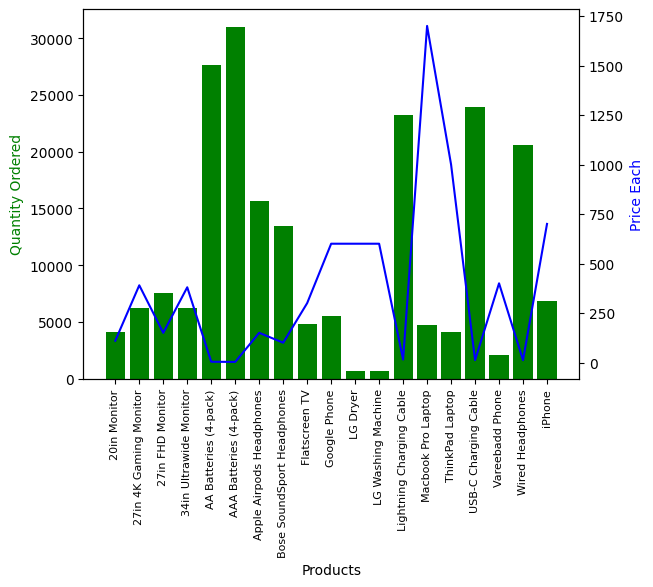

In [80]:
# Plot the price and sales of each product

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation = 90, size = 8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price Each', color = 'b')

plt.show()
